┌────────────┐                                ┌─────────────┐»
q_0: ─────┤ Ry(2.4366) ├────────────────────────────────┤ Ry(0.70503) ├»
          └─────┬──────┘┌────────────┐                  └──────┬──────┘»
q_1: ───────────┼───────┤ Ry(2.8726) ├─────────────────────────┼───────»
                │       └─────┬──────┘┌───────────┐            │       »
q_2: ───────────┼─────────────┼───────┤ Ry(3.105) ├────────────┼───────»
     ┌───┐      │             │       └─────┬─────┘┌───┐       │       »
q_3: ┤ H ├──────■─────────────■─────────────■──────┤ X ├───────■───────»
     └───┘                                         └───┘               »
«                                         
«q_0: ────────────────────────────────────
«     ┌─────────────┐                     
«q_1: ┤ Ry(0.26904) ├─────────────────────
«     └──────┬──────┘┌──────────────┐     
«q_2: ───────┼───────┤ Ry(0.036627) ├─────
«            │       └──────┬───────┘┌───┐
«q_3: ───────■──────────────■────────┤ X ├
«                                    └───┘

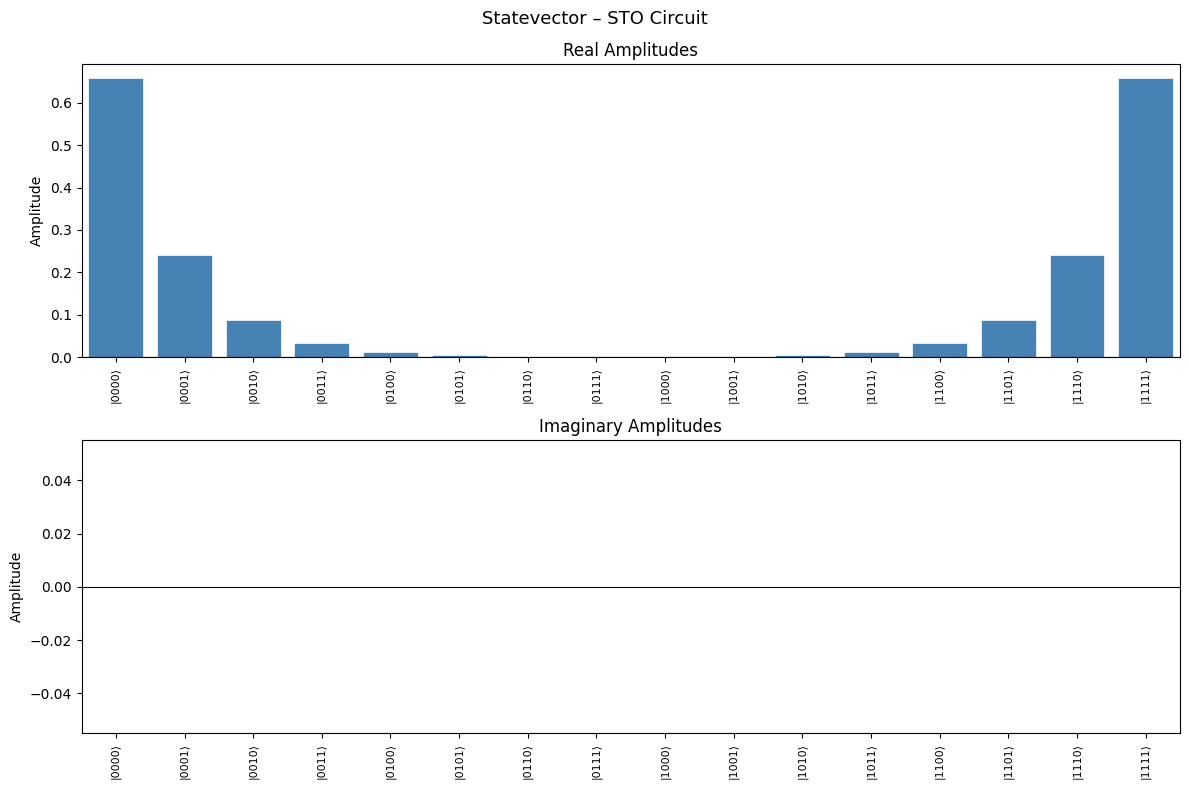

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, AncillaRegister
from qiskit.circuit.library import StatePreparation
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.circuit.library import QFT

def prepare_sto_state(n_qubits: int, a: float) -> QuantumCircuit:
    """Returns a circuit that prepares the state |ψ⟩ = N · Σ e^(-a·|i|) |i⟩."""
    qc = QuantumCircuit(n_qubits)
    last_qubit = n_qubits - 1

    qc.h(last_qubit)

    b = a
    for i in range(n_qubits-1):
        theta = 2 * np.arctan(np.exp(b))
        qc.cry(theta, last_qubit, i)
        b = b * 2
    qc.x(last_qubit)

    b = a
    for i in range(n_qubits-1):
        theta = 2 * np.arctan(np.exp(-b))
        qc.cry(theta, last_qubit, i)
        b = b * 2

    qc.x(last_qubit)

    return qc

n_qubits = 4
qc = prepare_sto_state(n_qubits, a = 1)

display(qc.draw())
sv = Statevector(qc)

data_amps = sv.data[:2**n_qubits]
n_states = 2 ** n_qubits
basis_labels = [format(i, f'0{n_qubits}b') for i in range(n_states)]
real_parts = data_amps.real
imag_parts = data_amps.imag

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
fig.suptitle("Statevector – STO Circuit", fontsize=13)

x = np.arange(n_states)

ax1.bar(x, real_parts, color='steelblue', edgecolor='white', linewidth=0.5)
ax1.axhline(0, color='black', linewidth=0.8)
ax1.set_title("Real Amplitudes")
ax1.set_xticks(x)
ax1.set_xticklabels([f'|{b}⟩' for b in basis_labels], rotation=90, fontsize=8)
ax1.set_ylabel("Amplitude")
ax1.set_xlim(-0.5, n_states - 0.5)

ax2.bar(x, imag_parts, color='coral', edgecolor='white', linewidth=0.5)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.set_title("Imaginary Amplitudes")
ax2.set_xticks(x)
ax2.set_xticklabels([f'|{b}⟩' for b in basis_labels], rotation=90, fontsize=8)
ax2.set_ylabel("Amplitude")
ax2.set_xlim(-0.5, n_states - 0.5)

plt.tight_layout()
plt.show()